# Financial Analysis of Credit Card Company

This is a case study analytical question.

You have to submit two things for this interview:

1) Document which contains answers to each question in the interview. Please write a DETAILED answer to each question justifying the answer, the assumptions you have made, etc. Try to follow the "5-Why" technique to answer each question - https://www.isixsigma.com/tools-templates/5-whys/case-study-using-the-5-whys-to-validate-assumption/

2) For all questions, please send your detailed calculations as well. You can send it as a doc file or excel (preferred) or jupyter/R notebook (also preferred).



## The Case Study

Analyzing an affinity credit card (special card only available to members of a specific group). Think of it like this - the credit card company is like Citibank and the affiliated group is a company like Indian Oil or Barista. The affiliated group has to pay some fees to credit card company (because the credit card company is providing this service to the group)

### Facts:

1. average card balance is Rs 1000
2. each card has an interest rate of 15%
3. membership fee is Rs 20 per card
4. loss rate is 3% (NOTE: what are the interpretations of this ? state your assumption CLEARLY when solving )
5. Rs 25 operating cost per card
6. Rs 10 affiliation fee per card (cost to the group organization itself, so that their members get this awesome card program)
7. 6.5% cost of funds (that credit card company must pay to the bank where it gets money)
8. bill/statement is issued on 1st of every month
9. credit-free period = 15 days from the bill/statement issue date.

Read more at:

//economictimes.indiatimes.com/articleshow/70886651.cms?from=mdr#targetText=General%20formula%20to%20calculate%20interest,x%2012%20month)%2F365.&utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst

There are two scenarios and all the following questions must be answered for both scenarios. There might be some terminology that may not be familiar to you. This is expected. We want to see if you can research and find out about them and then answer these questions.

For the below, two scenarios provide a monthly calculation of profits/losses

### Scenario 1:
- The interest rate is simple interest.
- Interest is calculated on a daily basis.
- The average card balance is the average end of month balance.
- All members are more than a year old.

### Scenario 2:
- The interest rate is compounded quarterly.
- Interest is calculated on a monthly basis.
- Membership grows at 5% month on month.
- Card balance grows at 5% per month for each member.
- The average card balance is the average end of month balance.

Consider 1000 customers for both the scenario, divide these 1000 customers into following groups(upon your assumption and understanding about the credit lending industry)
- customers who pay the bill within the credit-free period
- customers paying 30 days after the last due date
- customer paying 45 days after the last due date
- customer paying 60 days after the last due date(remove these customers for the complete calculation of the next month,basically, you are not supposed to provide further credit services to these customers)


### Answer the following for both scenarios.

Q1: How much profit % is generated in 1 year?

Q2: The 3% loss rate can either mean either 3% of the outstanding balance defaults or 3% of the borrowers default on their entire balance. If the average balance is increased to $2000, what happens to the loss?

Q3: Is a borrower with a low balance more or less likely to default then a borrower with a high balance? Why ? explain clearly

Q4: The group company has now become unhappy with the credit card provider. it wants to start its own credit card. But for that, it will need to purchase the customers from the current credit card company. If the affilated group offered Rs 20 per account to purchase all the customers from the credit card company, what would there profit be? (assume that we are only talking about 1 year)

Q5: What numbers can the financial institution change to convince the affiliated group not to want to purchase, while still not going into a loss? Give a range of what the new numbers are (min and max)

Q6: What is the extra cost(if any) company will have to incur if the customer delays the payment of the credit card bill after the due date?

Q7: Is it beneficial for the company if the customer pays the credit card bill after the due date? (express your views as a business strategy analyst with a short example)

For the below question consider yourself as a credit risk manager.

Which information variables you will use to calculate the credit card limit and the risk associated with it for an individual customer? Also, give the reason for your choice. (Example-Bureau score)


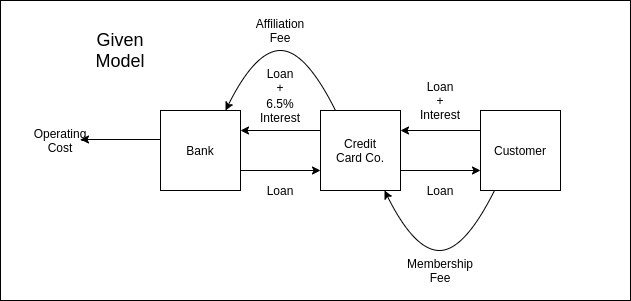





## Simple interest

In [ ]:
def calculated_interest(rate, total_cust, avg_card_bill, cust0, cust30, cust45, cust60):
  
  # We assume that effectively customers borrow such that the interest generated
  # is equivalent to what we calculate if they had borrowed whole amount on 15th 
  # of the month
  average_day_of_borrow = 15
  
  # The customer is given grace period of 15 days to pay back credit amount taken
  credit_free_period = 15

  interest0 = 0
  interest30 = (total_cust*cust30) * (avg_card_bill*rate*(average_day_of_borrow + credit_free_period + 30)/365) *12
  interest45 = (total_cust*cust45) * (avg_card_bill*rate*(average_day_of_borrow + credit_free_period + 45)/365) *12
  interest60 = (total_cust*cust60) * (avg_card_bill*rate*(average_day_of_borrow + credit_free_period + 60)/365) *12
  total_interest = interest0 + interest30 + interest45 + interest60
  
  return total_interest


#Parameter Initilization
total_cust = 1000

#Distruibuation of customer
#No delay = 90%
#Paid after 30 days = 5%
#Paid after 45 days = 4%
#Paid after 60 days = 1%
cust0  = 90/100
cust30 =  5/100
cust45 =  4/100
cust60 =  1/100

#Input parameters
avg_card_bill               = 1000     # Average bill at end of month
mem_fee_per_head_per_month  = 20       # Membership fee paid by customer
op_fee_per_head             = 25       # Operational costs incurred by bank
affi_fee_per_head           = 10       # Affiliation fee paid by credit card company
interest_rate_to_bank       = 6.5/100  # Interest rate levied by bank from credit card co.
rate                        =  15/100  # Interest rate paid by customer
loss_rate                   =   3/100  # Loss of principal and interest due to default by customer


#Source of earning per year
interest       = calculated_interest(rate, total_cust, avg_card_bill, cust0, cust30, cust45, cust60)
membership_fee = mem_fee_per_head_per_month * total_cust *12

#Expenses per year
affi_fee                   = affi_fee_per_head * total_cust
total_fund_taken_per_month = total_cust * avg_card_bill
cost_of_fund               = 12*(total_fund_taken_per_month * interest_rate_to_bank * 1/12) 
# 1/12 factor because credit card company keeps borrowing and paying back 
# each month to the bank, making borrow time 1/12th of year

loss                       = (interest) * loss_rate
# It is assumed that the borrower defaults only on interest
# the calculations don't work out if we assume that the 
# borrower defaults on entire principle amount and interest

#Profit per year
revenue   = interest + membership_fee
expenses  = cost_of_fund + loss + affi_fee
profit    = revenue - expenses
print("1. Profit generated if simple interest is used is(rounded off) = " + str(int(profit)))
print("2. If the avg_bill doubles, then loss will be(rounded) = " + str(int(2*loss)))


1. Profit generated if simple interest is used is(rounded off) = 198006
2. If the avg_bill doubles, then loss will be(rounded) = 2041


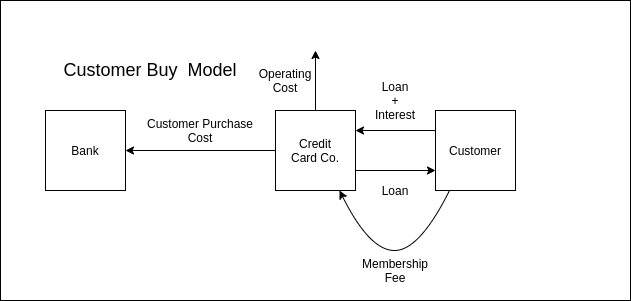

Now we analyze what financial numbers can bank adjust to prevent the credit card company from buying customer


## Description

### For Bank:
- 1 - Income is from the payment to purchase the customers
- 2 - Operating cost is saved
- 3 - Interest of 6.5% on the amount lent is lost

Change in Profits
- New Profit = 1
- Old Profit = 3 + Aff_fee - 2
- Delta Profit = New Profit - Old Profit = 1 + 2 - (3 + Aff)

### For Credit Card Company:
- 1 - Cost to purchase customer
- 2 - Operating cost

Change in profits
- New expense = 1 + 2
- Old expense = Interest + Aff_fee
- Net bank profit in Old model= Interest + Aff_fee - operating cost
- Delta Saving = Old - New = Interest + Aff_fee - 1 - 2

The bank now can instead, have a new interest rate, such that the old expenses are brought down to be equal to new expenses incurred by credit card company in new model. We also need to check if the interest rate calculated in such manner still keeps "Net bank profit in Old model" positive. This calculated interest rate would be the maximum interest rate possible to prevent loss of credit card company as a client. The minimum will be when the bank puts it's own "Net bank profit in Old model" to be zero, making older expenses even lower for the credit card company as compared to the newer expenses.


In [ ]:
purchase_cost_per_customer = 20
customer_purchase_cost     = purchase_cost_per_customer*total_cust
operating_cost   = op_fee_per_head  * total_cust

Net_profit_to_credit_card_co_new_model = interest + membership_fee - operating_cost - customer_purchase_cost
print("4. New profit to credit card company(rounded) = " + str(int(Net_profit_to_credit_card_co_new_model)))

4. New profit to credit card company(rounded) = 229027


In [ ]:
# Bringing old expenses incurred by credit card company down to new expenses in changed model
# require decrease in rate of interest charged
rate_max = ((customer_purchase_cost + operating_cost) - (affi_fee))*100/(total_fund_taken_per_month)
# 1/12 and 12 in multiplication have been implicitly cancelled
print("5. Maximum rate that prevents loss of clientele for Bank = " + str(rate_max) + "%")

# Net profit to bank in old model at new rate_max
net_profit = total_fund_taken_per_month*rate_max/100 + affi_fee - operating_cost
print("   Net profit under adjusted interest rate = " + str(net_profit))

# minimum rate will the one under which bank keeps no profit
rate_min = (operating_cost - affi_fee)*100/total_fund_taken_per_month
print("   Minimum rate which lets bank make neither profit nor loss = " + str(rate_min) + "%")

5. Maximum rate that prevents loss of clientele for Bank = 3.5%
   Net profit under adjusted interest rate = 20000.0
   Minimum rate which lets bank make neither profit nor loss = 1.5%


6. It's not clearly mentioned in question, but to be exact, the bank could be availing extra interest from credit card company in strictest sense for extra days the customer delays the payment. But that might be mitigated in some sense if company pays the bank from it's own reserve, saving itself from extraneous cost due to delay by customer. Thoguh ofcourse this is a lost opportunity, as that reserves might be used for investment somewhere else. That calculation has been omitted for simplicity 

7. Lets calculate the profit under old model, assuming no interest from customer, or that all customers pay on time 

In [ ]:
Profit_no_interest = membership_fee - cost_of_fund - affi_fee
print("7. Profit without interest from customers = " + str(int(Profit_no_interest)))
print("   Profit with interest = " + str(int(profit)))
print("   Additional benifit = " + str(int(profit - Profit_no_interest)))
print("One would clearly deduce that customers paying late helps\n\n\n")

7. Profit without interest from customers = 212344
   Profit with interest = 266513
   Additional benifit = 54168
One would clearly deduce that customers paying late helps





# Compounded interest

In [ ]:
def calculated_interest(list_eff_interest_rate, list_customer, list_avg_card_bill,
                              cust0, cust30, cust45, cust60):
  
  # We assume that effectively customers borrow such that the interest generated
  # is equivalent to what we calculate if they had borrowed whole amount on 15th 
  # of the month
  average_day_of_borrow = 15
  
  # The customer is given grace period of 15 days to pay back credit amount taken
  credit_free_period = 15

  total_interest = 0
  for month in range(12):
    interest0 = 0
    interest30 = (list_customer[month]*cust30 )* (list_avg_card_bill[month]*
                                                list_eff_interest_rate[month]*
                                                (average_day_of_borrow + credit_free_period + 30)/(12*30)
                                                )
    interest45 = (list_customer[month]*cust45 )* (list_avg_card_bill[month]*
                                                list_eff_interest_rate[month]*
                                                (average_day_of_borrow + credit_free_period + 45)/(12*30)
                                                )
    interest60 = (list_customer[month]*cust60 )* (list_avg_card_bill[month]*
                                                list_eff_interest_rate[month]*
                                                (average_day_of_borrow + credit_free_period + 60)/(12*30)
                                                )
    
    total_interest_month = interest0 + interest30 + interest45 + interest60
    total_interest = total_interest + total_interest_month
    
    
  return total_interest


def calculate_mem_fee(list_membership_fee, list_customer):
  total_mem_fee = 0
  for month in range(12):
    total_mem_fee = total_mem_fee + list_membership_fee[month] * list_customer[month]

  return total_mem_fee


def calculate_fund_taken_from_bank(list_avg_card_bill, list_customer):
  total_fund = 0
  for month in range(12):
    total_fund = total_fund + list_avg_card_bill[month] * list_customer[month]

  return total_fund


#Parameter Initilization
total_cust = 1000

#Distruibuation of customer
#No delay = 90%
#Paid after 30 days = 5%
#Paid after 45 days = 4%
#Paid after 60 days = 1%
cust0  = 90/100
cust30 =  5/100
cust45 =  4/100
cust60 =  1/100

#Input parameters
avg_card_bill            = 1000     # Average bill at end of month
mem_fee_per_head         = 20       # Membership fee paid by customer
op_fee_per_head          = 25       # Operational costs incurred by bank
affi_fee_per_head        = 10       # Affiliation fee paid by credit card company
interest_rate_to_bank    = 6.5/100  # Interest rate levied by bank from credit card co.
rate                     =  15/100  # Interest rate paid by customer
loss_rate                =   3/100  # Loss of principal and interest due to default by customer
month_on_month_mem_fee   =   5/100  # Increase rate in membership fee 
month_on_month_card_bill =   5/100  # Increase rate in average card bill

list_avg_card_bill  = [avg_card_bill]
list_membership_fee = [mem_fee_per_head]
list_customer       = [1000, 1000, 1000]
list_eff_rate = [rate]


for month in range(1,12):
  list_avg_card_bill .append( list_avg_card_bill[month-1] * (1+month_on_month_card_bill))
  list_membership_fee.append(list_membership_fee[month-1] * (1+month_on_month_mem_fee)  )

for month in range(3, 12):
  prev_month   = month-1
  borrow_month = month-3
  num_cust_to_be_removed = list_customer[borrow_month]*cust60
  active_customer = list_customer[prev_month]
  list_customer.append(active_customer - num_cust_to_be_removed)

for month in range(1, 12):
  group = int(month/(12/4)) # Interest grows each quarter
  list_eff_rate.append( rate * pow((1+rate), group) )


#Earnings
interest        = calculated_interest(list_eff_rate, list_customer, list_avg_card_bill,
                                      cust0, cust30, cust45, cust60)
membership_fee  = calculate_mem_fee(list_membership_fee, list_customer)

#Expenses
total_fund_taken = calculate_fund_taken_from_bank(list_avg_card_bill, list_customer)
cost_of_fund     = (total_fund_taken  * interest_rate_to_bank * 1/12)
affi_fee         = affi_fee_per_head * total_cust
loss             = (interest) * loss_rate

#Profit per year
revenue   = interest + membership_fee
expenses  = cost_of_fund + loss + affi_fee
profit    = revenue - expenses

print("1. Profit generated if simple interest is used is(rounded off) = " + str(int(profit)))
print("2. If the avg_bill doubles, then loss will be(rounded) = " + str(int(2*loss)))

1. Profit generated if simple interest is used is(rounded off) = 266513
2. If the avg_bill doubles, then loss will be(rounded) = 3350


In [ ]:
purchase_cost_per_customer = 20
customer_purchase_cost     = purchase_cost_per_customer*total_cust
operating_cost   = op_fee_per_head  * total_cust

Net_profit_to_credit_card_co_new_model = interest + membership_fee - operating_cost - customer_purchase_cost
print("4. New profit to credit card company(rounded) = " + str(int(Net_profit_to_credit_card_co_new_model)))

4. New profit to credit card company(rounded) = 315773


In [ ]:
# Bringing old expenses incurred by credit card company down to new expenses in changed model
# require decrease in rate of interest charged
rate_max = ((customer_purchase_cost + operating_cost) - (affi_fee))*100/(total_fund_taken/12)
# 1/12 and 12 in multiplication have been implicitly cancelled
print("5. Maximum rate that prevents loss of clientele for Bank = " + ("%0.2f" %rate_max) + "%")

# Net profit to bank in old model at new rate_max
net_profit = (total_fund_taken * rate_max/100 * 1/12) + affi_fee - operating_cost
print("   Net profit under adjusted interest rate = " + str(net_profit))

# minimum rate will the one under which bank keeps no profit
rate_min = (operating_cost - affi_fee)*100/(total_fund_taken/12)
print("   Minimum rate which lets bank make neither profit nor loss = " + ("%0.2f" %rate_min) + "%")


5. Maximum rate that prevents loss of clientele for Bank = 2.75%
   Net profit under adjusted interest rate = 20000.0
   Minimum rate which lets bank make neither profit nor loss = 1.18%


6. It's not clearly mentioned in question, but to be exact, the bank could be availing extra interest from credit card company in strictest sense for extra days the customer delays the payment. But that might be mitigated in some sense if company pays the bank from it's own reserve, saving itself from extraneous cost due to delay by customer. Thoguh ofcourse this is a lost opportunity, as that reserves might be used for investment somewhere else. That calculation has been omitted for simplicity 

7. Lets calculate the profit under old model, assuming no interest from customer, or that all customers pay on time 

In [ ]:
Profit_no_interest = membership_fee - cost_of_fund - affi_fee
print("7. Profit without interest from customers = " + str(int(Profit_no_interest)))
print("   Profit with interest = " + str(int(profit)))
print("   Additional benifit = " + str(int(profit - Profit_no_interest)))
print("One would clearly deduce that customers paying late helps\n\n\n")

7. Profit without interest from customers = 212344
   Profit with interest = 266513
   Additional benifit = 54168
One would clearly deduce that customers paying late helps





## 3. Default rate 

1. https://economictimes.indiatimes.com/industry/banking/finance/banking/default-rate-in-small-loans-lowest-study/articleshow/67250315.cms?from=mdr


2. https://www.insidearm.com/news/00044378-report-shows-profile-borrowers-who-are-li/#:~:text=Most%20defaults%20occur%20on%20lower,into%20the%20low%20balance%20category.

The probability of who will default is soemthing that I don't have any internal opinion / knowledge / model on. But a quick google reveasls 2 contrasting reports, one says that default rate on small loans is lowest. Other says it's very high. So it strongly depends on geography, economy and profile of borrower. I'd instead like to understand this aspect over time.